In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import math
from ddeint import ddeint
import copy

# 1 Load data

In [3]:
df=pd.read_csv('../data/TECAN_230217.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['C7'].to_numpy()
ydata2 = df.loc['C8'].to_numpy()

ymean = (ydata1+ydata2)/2;

df_MOPS = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_MOPS.loc[idx_] = df.loc[idx_] - ymean;
df_MOPS.loc['Time'] = df.iloc[0]/60

In [4]:
df=pd.read_csv('../data/TECAN_230210.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata1+ydata2+ydata3)/3; 

df_0210 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C','D','E','F']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_0210.loc[idx_] = df.loc[idx_] - ymean;
df_0210.loc['Time'] = df.iloc[0]/60

dict_0210a = {
    10: 0,
    9: 2,
    8: 4,
    7: 6,
    6: 16,
    5: 18,
    4: 20,
    3: 22,
    2: 32,
    1: 34,
    0: 36
}

dict_0210b = {
    10: 1,
    9: 3+8,
    8: 5,
    7: 7,
    6: 17,
    5: 19,
    4: 21,
    3: 23,
    2: 33,
    1: 35,
    0: 37
}

In [5]:
df=pd.read_csv('../data/TECAN_230504.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['C7'].to_numpy()
ydata2 = df.loc['C8'].to_numpy()

ymean = (ydata1+ydata2)/2;

df_0504 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_0504.loc[idx_] = df.loc[idx_] - ymean;
df_0504.loc['Time'] = df.iloc[0]/60

In [6]:
dict_a = {};
dict_b = {};

#dict_cali = {};

k = 0; 
for i in np.arange(10,-1,-1):
    dict_a[i] = 2*k;
    dict_b[i] = 2*k+1;
    k = k+1;
    

In [ ]:
### export source data

In [25]:
import xlsxwriter

workbook = xlsxwriter.Workbook("../output/Sfig1a.xlsx")
writer = pd.ExcelWriter("../output/Sfig1a.xlsx", engine = 'xlsxwriter')

df_MOPS.to_excel(writer, sheet_name = 'Exp-1')

df_0210_list = np.array([]);
for j in dict_0210a.keys():
    df_0210_list = np.append(df_0210_list, dict_0210a[j])
    df_0210_list = np.append(df_0210_list, dict_0210b[j])
df_0210_sub = df_0210.iloc[df_0210_list];
df_0210_sub.loc['Time'] = df_0210.loc['Time']
df_0210_sub.to_excel(writer, sheet_name = 'Exp-2')
df_0504.to_excel(writer, sheet_name = 'Exp-3')
writer.close()

<ipython-input-25-8319d2aa11b2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0210_sub.loc['Time'] = df_0210.loc['Time']


# 2 Plot1a

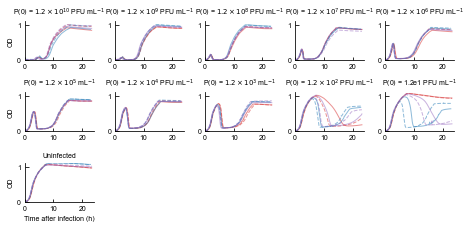

In [26]:
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({"figure.figsize": (1/0.618,1.0)})


matplotlib.rcParams.update({"figure.figsize": (6.5,3.2)})
alpha_ = 0.5; 
n_plot = 1; 
title_arr = [r'P(0) = $1.2\times10^{10}$ PFU mL$^{-1}$', r'P(0) = $1.2\times10^{9}$ PFU mL$^{-1}$',\
             r'P(0) = $1.2\times10^{8}$ PFU mL$^{-1}$',r'P(0) = $1.2\times10^{7}$ PFU mL$^{-1}$',\
             r'P(0) = $1.2\times10^{6}$ PFU mL$^{-1}$',r'P(0) = $1.2\times10^{5}$ mL$^{-1}$',\
             r'P(0) = $1.2\times10^{4}$ PFU mL$^{-1}$',r'P(0) = $1.2\times10^{3}$ mL$^{-1}$',\
             r'P(0) = $1.2\times10^{2}$ PFU mL$^{-1}$','P(0) = 1.2e1 PFU mL$^{-1}$', \
             'Uninfected']
for i in np.arange(10,-1,-1):
    ax = plt.subplot(3,5, n_plot)
    plt.title(title_arr[n_plot-1]) 
    
    '''
    xdata1 = df_cali.loc['Time']/60; #hour
    ydata1 = df_cali.iloc[dict_cali[i]];
    '''
    
    xdata1 = (df_MOPS.loc['Time'][6:] - df_MOPS.loc['Time'][6])/60; #hour
    ydata1a = df_MOPS.iloc[dict_a[i]][6:];
    ydata1b = df_MOPS.iloc[dict_b[i]][6:];
    
    
    xdata2 = (df_0504.loc['Time'][6:] - df_0504.loc['Time'][6])/60; #hour
    ydata2a = df_0504.iloc[dict_a[i]][6:];
    ydata2b = df_0504.iloc[dict_b[i]][6:];
    
    xdata3 = (df_0210.loc['Time'][6:] - df_0210.loc['Time'][6])/60; #hour
    ydata3a = df_0210.iloc[dict_0210a[i]][6:];
    ydata3b = df_0210.iloc[dict_0210b[i]][6:];
    
#    plt.plot(xdata1, ydata1, linewidth=1,color='tab:red')
    plt.plot(xdata3, ydata3a, linewidth=1,alpha=alpha_, color='tab:red',label='Exp 02/10')
    plt.plot(xdata3, ydata3b,'--', linewidth=1,alpha=alpha_, color='tab:red')

    plt.plot(xdata1, ydata1a, linewidth=1, alpha=alpha_, color='tab:blue', label = 'Exp 02/17')
    plt.plot(xdata1, ydata1b,'--', linewidth=1,alpha=alpha_, color='tab:blue')
    
    plt.plot(xdata2, ydata2a, linewidth=1,alpha=alpha_, color='tab:purple', label = 'Exp 05/04')
    plt.plot(xdata2, ydata2b,'--', linewidth=1,alpha=alpha_, color='tab:purple')
    
    
    if i == 0:
        plt.xlabel('Time after infection (h)')
    if i == 10 or i == 5 or i == 0:
        plt.ylabel('OD')
    plt.xlim((0,1440/60))
    plt.ylim((0,1.1))
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    
    n_plot = n_plot + 1;
plt.tight_layout()
plt.savefig('../output/Sfig1a.pdf', format='pdf', bbox_inches='tight')

# 3Plot 1b

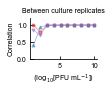

In [27]:
colors = ['tab:red','tab:blue','tab:purple']; 
labels = ['Exp 02/10','Exp 02/17', 'Exp 05/04']
markers = ['o','^','v']; 

coef_arr0210 = np.zeros(10)

k = 0;
for i in np.arange(10,0,-1):
    j1 = dict_0210a[i];
    j2 = dict_0210b[i];

    data1 = df_0210.iloc[j1].to_numpy()[6:]
    data2 = df_0210.iloc[j2].to_numpy()[6:]
    
    Ra = np.corrcoef(data1, data2)
    coef_arr0210[k] = Ra[0,1];
    k = k+1;

#################
coef_arrMOPS = np.zeros(10)

k = 0;
for i in np.arange(10,0,-1):
    j1 = 2*k;
    j2 = 2*k+1;

    data1 = df_MOPS.iloc[j1].to_numpy()[6:]
    data2 = df_MOPS.iloc[j2].to_numpy()[6:]
    
    Ra = np.corrcoef(data1, data2)
    coef_arrMOPS[k] = Ra[0,1];
    k = k+1;
    
#################
coef_arr0504 = np.zeros(10)

k = 0;
for i in np.arange(10,0,-1):
    j1 = 2*k;
    j2 = 2*k+1;

    data1 = df_0504.iloc[j1].to_numpy()[6:]
    data2 = df_0504.iloc[j2].to_numpy()[6:]
    
    Ra = np.corrcoef(data1, data2)
    coef_arr0504[k] = Ra[0,1];
    k = k+1;

#################
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({"figure.figsize": (1.2,0.75)})
    
ax = plt.subplot(1,1,1)
k = 0;
for coef_arr in (coef_arr0210, coef_arrMOPS, coef_arr0504):
    plt.plot(np.log10(1.2)+np.arange(10,0,-1), coef_arr, \
             marker=markers[k], linestyle ='-', label = labels[k], \
             markersize=3,linewidth=0.75,color=colors[k], alpha=0.5, zorder=20)
    k = k+1;

#plt.axhline(y=1, linewidth=0.75,color='k',zorder=10)
plt.ylabel('Correlation')
plt.xlabel('$(\log_{10}$[PFU mL$^{-1}$])')
plt.ylim((0,1.2))
plt.yticks([0,0.5,1.0])
plt.title('Between culture replicates')

#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.savefig('../output/Sfig1b.pdf', format='pdf', bbox_inches='tight')

### export source data

In [32]:
import xlsxwriter

workbook = xlsxwriter.Workbook("../output/Sfig1b.xlsx")
writer = pd.ExcelWriter("../output/Sfig1b.xlsx", engine = 'xlsxwriter')

df_tmptmp = pd.DataFrame([coef_arrMOPS, coef_arr0210, coef_arr0504])
df_tmptmp.to_excel(writer, sheet_name = 'Sfig1b')
writer.close()

# 4 Plot 1c

In [33]:
colors = ['tab:red','tab:blue','tab:purple']; 
labels = ['Exp 02/10','Exp 02/17', 'Exp 05/04']
markers = ['o','^','v']; 

coef_mean = np.zeros(10)
coef_err = np.zeros(10)

k = 0;
for i in np.arange(10,0,-1):
    j1 = dict_0210a[i];
    j2 = dict_0210b[i];

    data1 = df_0210.iloc[j1].to_numpy()[6:]
    data2 = df_0210.iloc[j2].to_numpy()[6:]
    

    j1 = 2*k;
    j2 = 2*k+1;

    data3 = df_MOPS.iloc[j1].to_numpy()[6:]
    data4 = df_MOPS.iloc[j2].to_numpy()[6:]
    
    j1 = 2*k;
    j2 = 2*k+1;

    data5 = df_0504.iloc[j1].to_numpy()[6:]
    data6 = df_0504.iloc[j2].to_numpy()[6:]
    
    data_all = [data1,data2,data3,data4,data5,data6];
    
    Ra = np.zeros(1000); 
    for Num in range(1000):
        id_ = np.random.choice(6, 2, replace=False)
        tmp1 = data_all[id_[0]]
        tmp2 = data_all[id_[1]]
        len_ = min(len(tmp1), len(tmp2))
        Ra[Num] = np.corrcoef(tmp1[:len_], tmp2[:len_])[0][1]
    coef_mean[k] = np.mean(Ra)
    coef_err[k] = np.std(Ra)
    k = k+1;


No handles with labels found to put in legend.


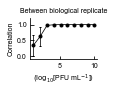

In [34]:
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({"figure.figsize": (1.2,0.75)})
ax = plt.subplot(1,1,1)

plt.errorbar(np.log10(1.2)+np.arange(10,0,-1), coef_mean, coef_err, \
             linestyle ='-', marker='o',\
             markersize=3,linewidth=0.75,color='k',capsize=1, zorder=20)


#plt.axhline(y=1, linewidth=0.75,color='k',zorder=10)
plt.ylabel('Correlation')
plt.xlabel('$(\log_{10}$[PFU mL$^{-1}$])')
plt.ylim((-0.1,1.2))
plt.yticks([0,0.5,1.0])
plt.title('Between biological replicate')

plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.savefig('../output/Sfig1c.pdf', format='pdf', bbox_inches='tight')

### export source data

In [35]:
import xlsxwriter

workbook = xlsxwriter.Workbook("../output/Sfig1c.xlsx")
writer = pd.ExcelWriter("../output/Sfig1c.xlsx", engine = 'xlsxwriter')

df_tmptmp = pd.DataFrame([coef_mean, coef_err])
df_tmptmp.to_excel(writer, sheet_name = 'Sfig1c')
writer.close()